### Definir librerias
Usualmente para realizar EDA, necesitaremos 4 librerías. : La librería NumPy para todo lo que necesitemos realizar con matrices y álgebra lineal.

Pandas para realizar el procesamniento del dataset, ordenarlo, agruparlo, integrarlo con otro dataset o filtrarlo.

Finalmente, todo el proceso de visualización, utilizaremos principalemnte dos librerías Seaborn y matplotlib.

Scikit-Learn es una librería esencial para entrenar y evaluar modelos de machine learning, incluido XGBoost. Proporciona herramientas para la selección de características, validación cruzada, métricas de evaluación y más.

Para crear y entrenar modelos XGBoost. Puedes instalarla mediante pip install xgboost.

Para crear gráficos Shap summary, necesitarás la librería SHAP. Puedes instalarla mediante pip install shap.


In [ ]:
#from PIfunctions import *
#import FuncionesNico as ni
from datetime import datetime
import pickle
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#import functions as fun
import joblib
import hashlib
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import xgboost as xgb
from joblib import dump, load
import os
from sklearn.inspection import permutation_importance
#import eli5
from sklearn.feature_selection import SelectFromModel
#from eli5.sklearn import PermutationImportance
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
#from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import shap
import pandas as pd

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### Acceso a Drive y carga del archivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=('/content/drive/MyDrive/ProyectoIntegrado/INFO/data_1.pkl')

In [ ]:
with open(df, 'rb') as archivo:
    df = pickle.load(archivo)

In [ ]:
df

,Unnamed: 0,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,...,Var 126,Var 127,Var 128,Var 129,Var 130,Var 131,Var 132,Var 133,Var 134,Var 135
0,2018-01-01 00:00:00,49.152264,95.0,0.014524,0.162538,NaN,0.0,68.0,80.0,0.0,...,6.539671,37.422935,41.000000,43.724609,35.645996,0.391545,NaN,NaN,48.400002,50.443760
1,2018-01-01 01:00:00,73.235420,95.0,0.003413,26.806496,NaN,0.0,68.0,80.0,0.0,...,6.231956,37.437691,40.000000,26.665812,33.850876,0.082780,NaN,NaN,48.400002,49.412949
2,2018-01-01 02:00:00,91.367134,95.0,0.003074,14.038163,NaN,0.0,68.0,80.0,0.0,...,6.230475,37.884800,40.000000,22.784370,35.925587,0.356169,NaN,NaN,50.500000,49.519276
3,2018-01-01 03:00:00,98.295097,95.0,0.003180,6.074811,NaN,0.0,68.0,80.0,0.0,...,6.193382,38.667625,40.000000,23.578878,35.844582,0.330285,NaN,NaN,50.500000,48.687454
4,2018-01-01 04:00:00,91.981880,65.0,0.003180,3.832892,NaN,0.0,68.0,80.0,0.0,...,6.394294,38.397526,40.000000,21.862959,38.925537,1.079565,NaN,NaN,50.500000,48.626068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47455,2023-05-31 21:00:00,8.425359,100.0,0.000000,17.781645,-1.67,0.0,71.0,80.0,0.0,...,12.233044,39.652195,44.859791,15.202159,42.039055,5.423398,NaN,NaN,48.599998,41.828869
47456,2023-05-31 22:00:00,1.742280,100.0,0.000000,40.442970,-1.67,0.0,71.0,80.0,0.0,...,12.358410,38.665089,43.000244,14.848001,42.329174,2.173208,NaN,NaN,48.599998,41.843899
47457,2023-05-31 23:00:00,8.084702,100.0,0.000000,11.903734,-1.67,0.0,71.0,80.0,0.0,...,12.575443,39.677547,43.149021,14.492805,43.645870,0.095899,NaN,NaN,48.599998,41.862244
47458,2023-06-01 00:00:00,25.063681,100.0,0.000586,13.823203,-1.67,0.0,71.0,80.0,0.0,...,12.644264,39.617573,45.527000,14.384085,48.744995,6.285383,NaN,NaN,48.599998,41.861347


###Análisis exploratorio
El análisis exploratorio de datos (EDA por sus siglas en inglés) implica el uso de gráficos y visualizaciones para explorar y analizar un conjunto de datos. El objetivo es explorar, investigar y aprender, no confirmar hipótesis estadísticas. Con el EDA, se pueden hallar anomalías en los datos, como valores atípicos u observaciones inusuales, revelar patrones, comprender posibles relaciones entre variables y generar preguntas o hipótesis interesantes que se pueden comprobar más adelante mediante métodos estadísticos más formales.

In [ ]:
# Supongamos que tu DataFrame se llama df y quieres establecer 'Unnamed: 0' como índice
df.set_index('Unnamed: 0', inplace=True)

# Verificación
print(df.head())  # Muestra las primeras filas del DataFrame con 'Unnamed: 0' como índice


                         Var 1  Var 2     Var 3      Var 4  Var 5  Var 6  \
Unnamed: 0                                                                 
2018-01-01 00:00:00  49.152264   95.0  0.014524   0.162538    NaN    0.0   
2018-01-01 01:00:00  73.235420   95.0  0.003413  26.806496    NaN    0.0   
2018-01-01 02:00:00  91.367134   95.0  0.003074  14.038163    NaN    0.0   
2018-01-01 03:00:00  98.295097   95.0  0.003180   6.074811    NaN    0.0   
2018-01-01 04:00:00  91.981880   65.0  0.003180   3.832892    NaN    0.0   

                     Var 7  Var 8  Var 9    Var 10  ...   Var 126    Var 127  \
Unnamed: 0                                          ...                        
2018-01-01 00:00:00   68.0   80.0    0.0  3.101010  ...  6.539671  37.422935   
2018-01-01 01:00:00   68.0   80.0    0.0  3.508585  ...  6.231956  37.437691   
2018-01-01 02:00:00   68.0   80.0    0.0  3.205553  ...  6.230475  37.884800   
2018-01-01 03:00:00   68.0   80.0    0.0  3.367718  ...  6.193382  

In [ ]:
df

,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,Var 10,...,Var 126,Var 127,Var 128,Var 129,Var 130,Var 131,Var 132,Var 133,Var 134,Var 135
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,49.152264,95.0,0.014524,0.162538,NaN,0.0,68.0,80.0,0.0,3.101010,...,6.539671,37.422935,41.000000,43.724609,35.645996,0.391545,NaN,NaN,48.400002,50.443760
2018-01-01 01:00:00,73.235420,95.0,0.003413,26.806496,NaN,0.0,68.0,80.0,0.0,3.508585,...,6.231956,37.437691,40.000000,26.665812,33.850876,0.082780,NaN,NaN,48.400002,49.412949
2018-01-01 02:00:00,91.367134,95.0,0.003074,14.038163,NaN,0.0,68.0,80.0,0.0,3.205553,...,6.230475,37.884800,40.000000,22.784370,35.925587,0.356169,NaN,NaN,50.500000,49.519276
2018-01-01 03:00:00,98.295097,95.0,0.003180,6.074811,NaN,0.0,68.0,80.0,0.0,3.367718,...,6.193382,38.667625,40.000000,23.578878,35.844582,0.330285,NaN,NaN,50.500000,48.687454
2018-01-01 04:00:00,91.981880,65.0,0.003180,3.832892,NaN,0.0,68.0,80.0,0.0,4.129462,...,6.394294,38.397526,40.000000,21.862959,38.925537,1.079565,NaN,NaN,50.500000,48.626068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 21:00:00,8.425359,100.0,0.000000,17.781645,-1.67,0.0,71.0,80.0,0.0,-1.670000,...,12.233044,39.652195,44.859791,15.202159,42.039055,5.423398,NaN,NaN,48.599998,41.828869
2023-05-31 22:00:00,1.742280,100.0,0.000000,40.442970,-1.67,0.0,71.0,80.0,0.0,-1.670000,...,12.358410,38.665089,43.000244,14.848001,42.329174,2.173208,NaN,NaN,48.599998,41.843899
2023-05-31 23:00:00,8.084702,100.0,0.000000,11.903734,-1.67,0.0,71.0,80.0,0.0,-1.670000,...,12.575443,39.677547,43.149021,14.492805,43.645870,0.095899,NaN,NaN,48.599998,41.862244


In [ ]:
# Supongamos que ya has establecido 'Unnamed: 0' como índice
df.index.name = None

# Verificación
print(df.head())  # Muestra las primeras filas del DataFrame sin nombre de columna índice



                         Var 1  Var 2     Var 3      Var 4  Var 5  Var 6  \
2018-01-01 00:00:00  49.152264   95.0  0.014524   0.162538    NaN    0.0   
2018-01-01 01:00:00  73.235420   95.0  0.003413  26.806496    NaN    0.0   
2018-01-01 02:00:00  91.367134   95.0  0.003074  14.038163    NaN    0.0   
2018-01-01 03:00:00  98.295097   95.0  0.003180   6.074811    NaN    0.0   
2018-01-01 04:00:00  91.981880   65.0  0.003180   3.832892    NaN    0.0   

                     Var 7  Var 8  Var 9    Var 10  ...   Var 126    Var 127  \
2018-01-01 00:00:00   68.0   80.0    0.0  3.101010  ...  6.539671  37.422935   
2018-01-01 01:00:00   68.0   80.0    0.0  3.508585  ...  6.231956  37.437691   
2018-01-01 02:00:00   68.0   80.0    0.0  3.205553  ...  6.230475  37.884800   
2018-01-01 03:00:00   68.0   80.0    0.0  3.367718  ...  6.193382  38.667625   
2018-01-01 04:00:00   68.0   80.0    0.0  4.129462  ...  6.394294  38.397526   

                     Var 128    Var 129    Var 130   Var 131  

In [ ]:
df

,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,Var 10,...,Var 126,Var 127,Var 128,Var 129,Var 130,Var 131,Var 132,Var 133,Var 134,Var 135
2018-01-01 00:00:00,49.152264,95.0,0.014524,0.162538,NaN,0.0,68.0,80.0,0.0,3.101010,...,6.539671,37.422935,41.000000,43.724609,35.645996,0.391545,NaN,NaN,48.400002,50.443760
2018-01-01 01:00:00,73.235420,95.0,0.003413,26.806496,NaN,0.0,68.0,80.0,0.0,3.508585,...,6.231956,37.437691,40.000000,26.665812,33.850876,0.082780,NaN,NaN,48.400002,49.412949
2018-01-01 02:00:00,91.367134,95.0,0.003074,14.038163,NaN,0.0,68.0,80.0,0.0,3.205553,...,6.230475,37.884800,40.000000,22.784370,35.925587,0.356169,NaN,NaN,50.500000,49.519276
2018-01-01 03:00:00,98.295097,95.0,0.003180,6.074811,NaN,0.0,68.0,80.0,0.0,3.367718,...,6.193382,38.667625,40.000000,23.578878,35.844582,0.330285,NaN,NaN,50.500000,48.687454
2018-01-01 04:00:00,91.981880,65.0,0.003180,3.832892,NaN,0.0,68.0,80.0,0.0,4.129462,...,6.394294,38.397526,40.000000,21.862959,38.925537,1.079565,NaN,NaN,50.500000,48.626068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 21:00:00,8.425359,100.0,0.000000,17.781645,-1.67,0.0,71.0,80.0,0.0,-1.670000,...,12.233044,39.652195,44.859791,15.202159,42.039055,5.423398,NaN,NaN,48.599998,41.828869
2023-05-31 22:00:00,1.742280,100.0,0.000000,40.442970,-1.67,0.0,71.0,80.0,0.0,-1.670000,...,12.358410,38.665089,43.000244,14.848001,42.329174,2.173208,NaN,NaN,48.599998,41.843899
2023-05-31 23:00:00,8.084702,100.0,0.000000,11.903734,-1.67,0.0,71.0,80.0,0.0,-1.670000,...,12.575443,39.677547,43.149021,14.492805,43.645870,0.095899,NaN,NaN,48.599998,41.862244
2023-06-01 00:00:00,25.063681,100.0,0.000586,13.823203,-1.67,0.0,71.0,80.0,0.0,-1.670000,...,12.644264,39.617573,45.527000,14.384085,48.744995,6.285383,NaN,NaN,48.599998,41.861347


In [ ]:
#D Columnas nulas
null = (df.isna().sum()/len(df)*100).round(1)
null = null[null > 10].sort_values(ascending=False)
print(null)

Var 132    100.0
Var 133    100.0
Var 29      85.8
Var 87      68.6
Var 88      68.6
Var 32      23.8
Var 31      11.6
Var 33      11.6
dtype: float64


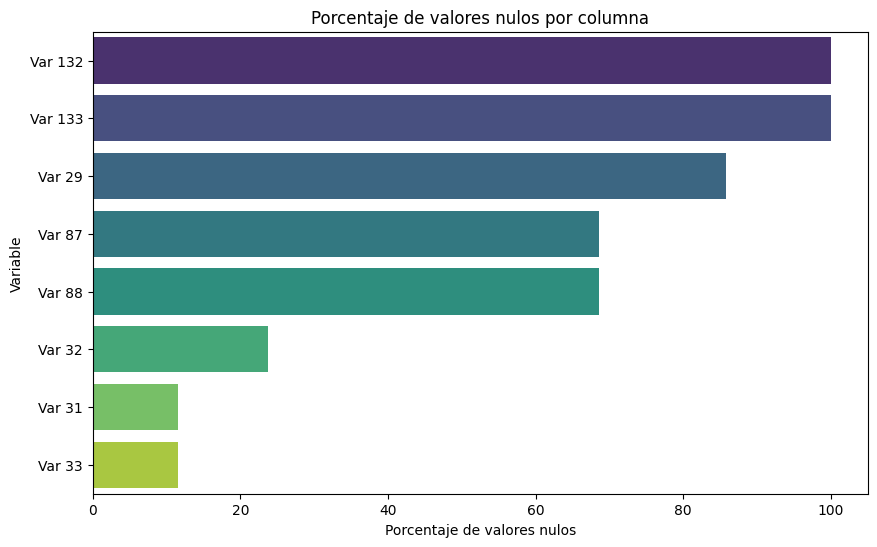

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=null.values, y=null.index, palette='viridis')

plt.xlabel('Porcentaje de valores nulos')
plt.ylabel('Variable')
plt.title('Porcentaje de valores nulos por columna')


plt.show()

In [ ]:
# Columnas cero
zero = ((df == 0).sum()/len(df)*100).round(1)
zero = zero[zero > 10].sort_values(ascending=False)
print(zero)

Var 20     99.5
Var 6      98.7
Var 96     98.7
Var 24     98.2
Var 12     98.1
Var 92     96.1
Var 99     94.5
Var 9      93.4
Var 19     82.9
Var 94     74.5
Var 95     62.4
Var 91     48.1
Var 38     44.1
Var 37     26.9
Var 2      25.6
Var 98     21.2
Var 3      17.1
Var 112    15.2
Var 104    13.9
Var 102    12.3
Var 14     11.1
dtype: float64


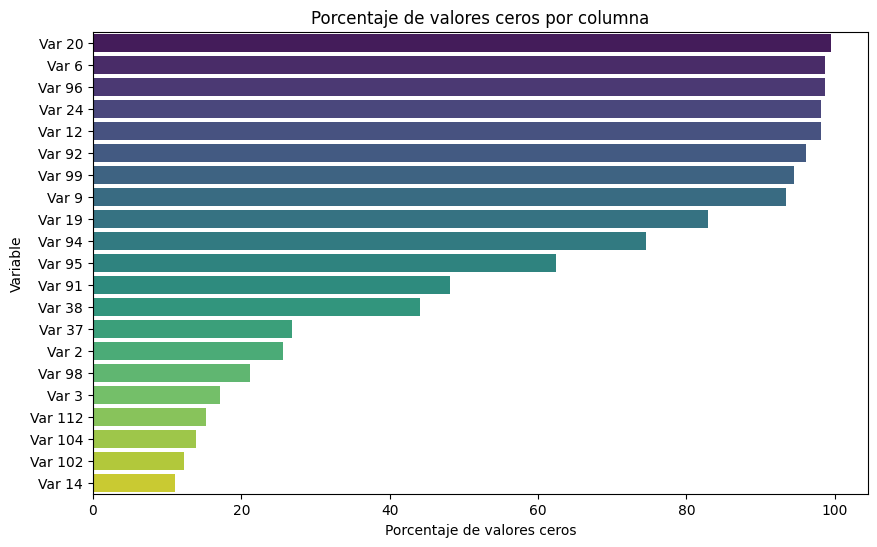

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=zero.values, y=zero.index, palette='viridis')

plt.xlabel('Porcentaje de valores ceros')
plt.ylabel('Variable')
plt.title('Porcentaje de valores ceros por columna')

plt.show()

In [ ]:
# Crear la lista de variables con más cantidad de ceros
variables_con_mas_ceros = list(zero.index)

# Imprimir la lista
print("Variables con más cantidad de ceros:")
print(variables_con_mas_ceros)

Variables con más cantidad de ceros:
['Var 20', 'Var 6', 'Var 96', 'Var 24', 'Var 12', 'Var 92', 'Var 99', 'Var 9', 'Var 19', 'Var 94', 'Var 95', 'Var 91', 'Var 38', 'Var 37', 'Var 2', 'Var 98', 'Var 3', 'Var 112', 'Var 104', 'Var 102', 'Var 14']


In [ ]:
#Filas duplicadas
df[df.duplicated()]

,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,Var 10,...,Var 126,Var 127,Var 128,Var 129,Var 130,Var 131,Var 132,Var 133,Var 134,Var 135
2018-06-01 01:00:00,49.189198,0.000000,0.041100,9.651211,0.627125,0.000000,68.0,80.0,0.0,4.750014,...,7.056498,36.943783,40.000000,49.345406,19.736719,11.953921,NaN,NaN,52.799999,51.686989
2019-01-01 00:00:00,49.452457,35.000000,0.008482,2.324809,0.591542,0.000000,64.0,80.0,0.0,5.223834,...,11.472631,32.309959,39.000000,51.451096,23.261995,3.219156,NaN,NaN,47.599998,47.628262
2019-06-01 01:00:00,49.122635,30.000000,0.013322,23.735416,0.622247,0.000000,64.0,85.0,0.0,6.069829,...,8.817767,38.019161,44.955181,46.931820,50.185280,9.715487,NaN,NaN,52.000000,50.476963
2020-01-01 00:00:00,49.146690,20.000000,0.014682,0.150240,0.677407,0.000000,46.0,85.0,0.0,5.049396,...,5.548462,12.621710,38.629391,28.355764,55.885841,14.244353,NaN,NaN,47.700001,48.119793
2020-06-01 01:00:00,49.130020,0.000000,0.004003,28.678530,-1.670000,0.000000,69.0,80.0,0.0,4.164020,...,3.460636,36.556637,42.475502,36.174431,18.654919,13.145829,NaN,NaN,52.200001,49.707584
2021-01-01 00:00:00,49.146690,0.000000,0.000000,29.248812,0.522802,0.000000,72.0,80.0,0.0,-1.670000,...,4.981269,35.493523,39.063145,38.937473,32.906837,9.613337,NaN,NaN,47.000000,49.857994
2021-06-01 01:00:00,49.453728,35.000000,0.000000,19.933762,-1.670000,0.000000,70.0,80.0,0.0,-1.670000,...,5.525087,34.411053,42.687546,16.564739,47.762897,15.525106,NaN,NaN,51.799999,50.963825
2022-01-01 00:00:00,49.456264,38.775970,0.000969,36.542206,-1.670000,0.000000,67.0,80.0,0.0,4.822854,...,7.431688,36.483398,40.000000,36.680573,15.871984,8.592038,NaN,NaN,44.500000,47.741962
2022-06-01 01:00:00,49.174057,23.467352,0.000879,19.796022,1.779739,18.099718,69.0,80.0,0.0,0.331003,...,19.895460,38.666451,39.000000,21.384130,31.585112,12.044552,NaN,NaN,51.000000,48.754154
2023-01-01 00:00:00,49.442307,95.000000,0.012480,18.982958,-1.670000,0.000000,70.0,85.0,0.0,-1.670000,...,2.875758,38.623302,40.673294,23.143044,26.862600,2.697594,NaN,NaN,46.500000,38.432167


In [ ]:
#Variable objetivo
df[['Var 90']].describe()

,Var 90
count,46853.000000
mean,8.545178
std,2.820826
min,0.000000
25%,7.183958
50%,7.913641
75%,9.158316
max,19.999475


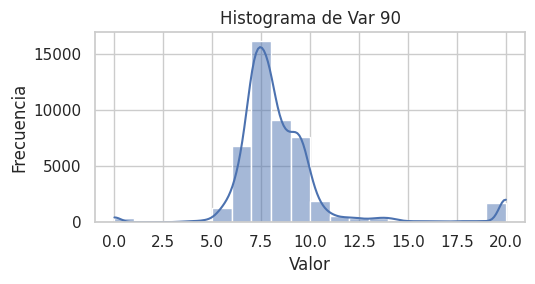

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.histplot(df['Var 90'], bins=20, kde=True)
plt.title('Histograma de Var 90')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

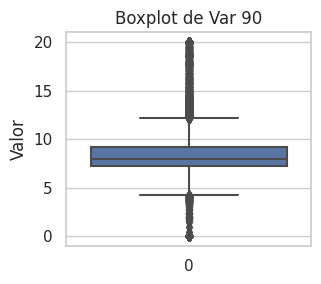

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 3))

# Boxplot para '220AIT473.PNT'
plt.subplot(1, 2, 1)
sns.boxplot(data=df['Var 90'])
plt.title('Boxplot de Var 90')
plt.ylabel('Valor')

plt.tight_layout()
plt.show()

In [ ]:
#Eliminar columnas nulas
#df = df.drop(columns = null.index)

#Eliminar columnas con ceros
#df = df.drop(columns = ['220TV708.OUT', '220FV465.OUT'])

#Eliminar fechas duplicadas
#df = df.drop(duplicados.index)

#print('dataset tratado:', df.shape)

#Datos filtrados
#df = df[df['220YIC008.MEAS']> 1500]

#print('dataset filtrado:', df.shape)

In [ ]:
#definimos variable objetivo y parametros para cargar un modelo y random para generacion de numero aleatorios que utilizaremos en el algoritm
target_feature = 'Var 90'
load_models = False
random_seed = 47

In [ ]:
#leemos el dataframe guardado en formato pkl
#df = pd.read_pickle('dfresidual1.pkl')

In [ ]:
df.shape

(47460, 135)

In [ ]:
#revisamos los Nan y los sumamos
df.isna().sum()

Var 1          8
Var 2        221
Var 3        642
Var 4        229
Var 5       2440
           ...  
Var 131      615
Var 132    47460
Var 133    47460
Var 134        0
Var 135     1131
Length: 135, dtype: int64

In [ ]:
#funcion para eliminar Nan o valores repetidos, las bombas y v/v al entregar valores NaN serán eliminados.
def eliminar_columnas_nan_y_repetidos(df, umbral_nan=0.4, umbral_repetidos=0.4):
    num_filas = df.shape[0]
    columnas_a_eliminar = []
    mensajes_eliminar = []

    for columna in df.columns:
        valores_nan = df[columna].isnull().sum()
        porcentaje_nan = valores_nan / num_filas

        if porcentaje_nan > umbral_nan:
            columnas_a_eliminar.append(columna)
            mensajes_eliminar.append(f"La columna '{columna}' ha sido eliminada porque contiene {porcentaje_nan*100:.2f}% de valores NaN.")
        else:
            valores_repetidos = df[columna].value_counts().iloc[0]
            porcentaje_repetidos = valores_repetidos / num_filas

            if porcentaje_repetidos > umbral_repetidos:
                columnas_a_eliminar.append(columna)
                mensajes_eliminar.append(f"La columna '{columna}' ha sido eliminada porque contiene {porcentaje_repetidos*100:.2f}% de valores repetidos.")

    df_filtrado = df.drop(columnas_a_eliminar, axis=1)

    if len(mensajes_eliminar) > 0:
        print("Mensajes de eliminación:")
        for mensaje in mensajes_eliminar:
            print(mensaje)

    return df_filtrado

In [ ]:
df.shape

(47460, 135)

In [ ]:
#aplicamos la funcion
df=eliminar_columnas_nan_y_repetidos(df)


Mensajes de eliminación:
La columna 'Var 6' ha sido eliminada porque contiene 98.68% de valores repetidos.
La columna 'Var 8' ha sido eliminada porque contiene 46.66% de valores repetidos.
La columna 'Var 9' ha sido eliminada porque contiene 93.40% de valores repetidos.
La columna 'Var 10' ha sido eliminada porque contiene 51.19% de valores repetidos.
La columna 'Var 12' ha sido eliminada porque contiene 98.07% de valores repetidos.
La columna 'Var 16' ha sido eliminada porque contiene 82.76% de valores repetidos.
La columna 'Var 17' ha sido eliminada porque contiene 91.75% de valores repetidos.
La columna 'Var 19' ha sido eliminada porque contiene 82.89% de valores repetidos.
La columna 'Var 20' ha sido eliminada porque contiene 99.49% de valores repetidos.
La columna 'Var 24' ha sido eliminada porque contiene 98.24% de valores repetidos.
La columna 'Var 29' ha sido eliminada porque contiene 85.75% de valores NaN.
La columna 'Var 38' ha sido eliminada porque contiene 44.12% de valores

In [ ]:
#revisamos cuantas columnas quedaron
df.shape

(47460, 110)

In [ ]:
#Eliminar variables OUT
df = df.drop(columns = ['Var 3', 'Var 104', 'Var 102'])

In [ ]:
df.shape

(47460, 107)

In [ ]:
#eliminar filas duplicadas (fechas)
# Verificar duplicados


duplicados = df[df.index.duplicated()]
duplicados

# Imprimir las filas duplicadas (si las hay)
if not duplicados.empty:
    print("Filas duplicadas:")
    print(duplicados)
else:
    print("No se encontraron filas duplicadas.")

Filas duplicadas:
                         Var 1      Var 2      Var 4     Var 5  Var 7  \
2018-06-01 01:00:00  49.189198   0.000000   9.651211  0.627125   68.0   
2019-01-01 00:00:00  49.452457  35.000000   2.324809  0.591542   64.0   
2019-06-01 01:00:00  49.122635  30.000000  23.735416  0.622247   64.0   
2020-01-01 00:00:00  49.146690  20.000000   0.150240  0.677407   46.0   
2020-06-01 01:00:00  49.130020   0.000000  28.678530 -1.670000   69.0   
2021-01-01 00:00:00  49.146690   0.000000  29.248812  0.522802   72.0   
2021-06-01 01:00:00  49.453728  35.000000  19.933762 -1.670000   70.0   
2022-01-01 00:00:00  49.456264  38.775970  36.542206 -1.670000   67.0   
2022-06-01 01:00:00  49.174057  23.467352  19.796022  1.779739   69.0   
2023-01-01 00:00:00  49.442307  95.000000  18.982958 -1.670000   70.0   

                       Var 11     Var 13    Var 14     Var 15     Var 18  ...  \
2018-06-01 01:00:00  5.092075  70.000000  0.000976  37.373535   6.513075  ...   
2019-01-01 00:00

In [ ]:
# Eliminar filas duplicadas basadas en la columna de fecha (mantener fecha)
df = df.drop_duplicates()

In [ ]:
df.shape

(47450, 107)

In [ ]:
#incluimos un filtro para que solo se consideren valores optimos
filtro_producciónSF2= df['Var 81']> 1500 #adt/d
df= df[filtro_producciónSF2]

In [ ]:
df.shape

(43928, 107)

In [ ]:
#funcion para graficar
def plot_var(df, var=None, limit=None, index_from=None, index_to=None, normalized=False, color=None, marker=None):
    '''Returned ax plot.'''
    if var:
        df = df[var]

    if(index_from and index_to):
        df = df[(df.index >= index_from ) & (df.index <= index_to) ]
    elif(index_from):
        df = df[(df.index >= index_from )  ]
    elif(index_to):
        df = df[(df.index <= index_to) ]

    if normalized :
        df = normalize(df)

    if(type(df) == pd.Series or (var and len(var) == 1 )):
        color = 'blue'
    ax = df.plot(figsize=(16, 6), color=color, marker=marker)

    if limit:
        ax.axhline(limit, color='r')

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return ax

<Axes: >

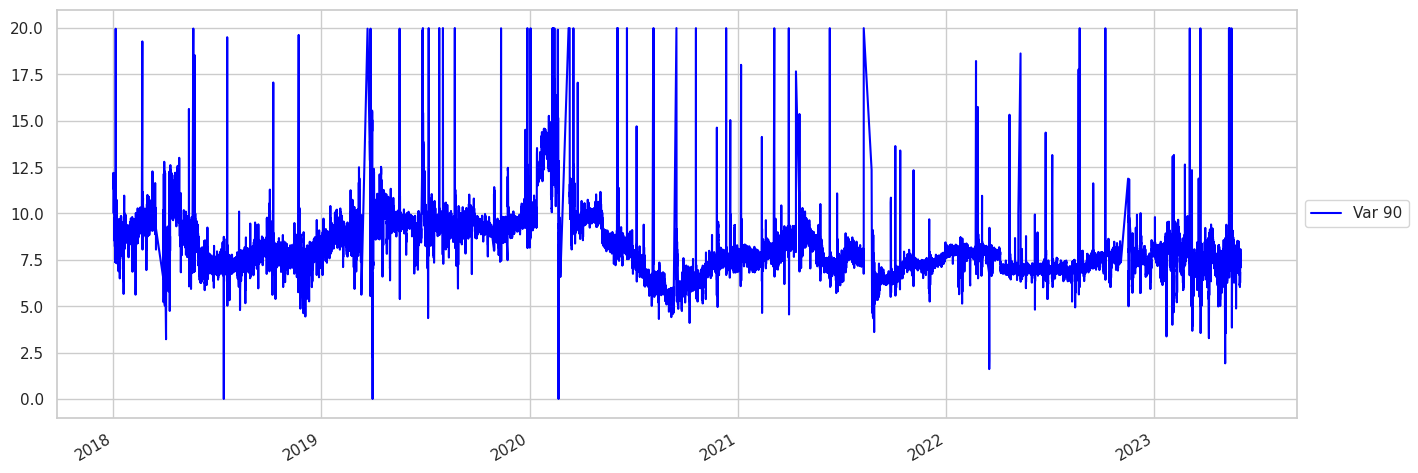

In [ ]:
#graficamos nuestra variable objetivo para ver su comportamiento
plot_var(df[target_feature],normalized=False)

In [ ]:
df1=df

In [ ]:
# 1. Calcular el IQR para cada columna
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# 2. Identificar los outliers y reemplazarlos por NaN
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 2.5 * IQR

# Crear una copia del DataFrame para no modificar el original
df = df1.copy()

# Iterar a través de las columnas y reemplazar los outliers por NaN
for column in df.columns:
    df[column][(df1[column] < lower_bound[column]) | (df1[column] > upper_bound[column])] = np.nan

# 3. Utilizar la función interpolate() para interpolar los valores NaN
df.interpolate(method='linear', inplace=True)


<Axes: >

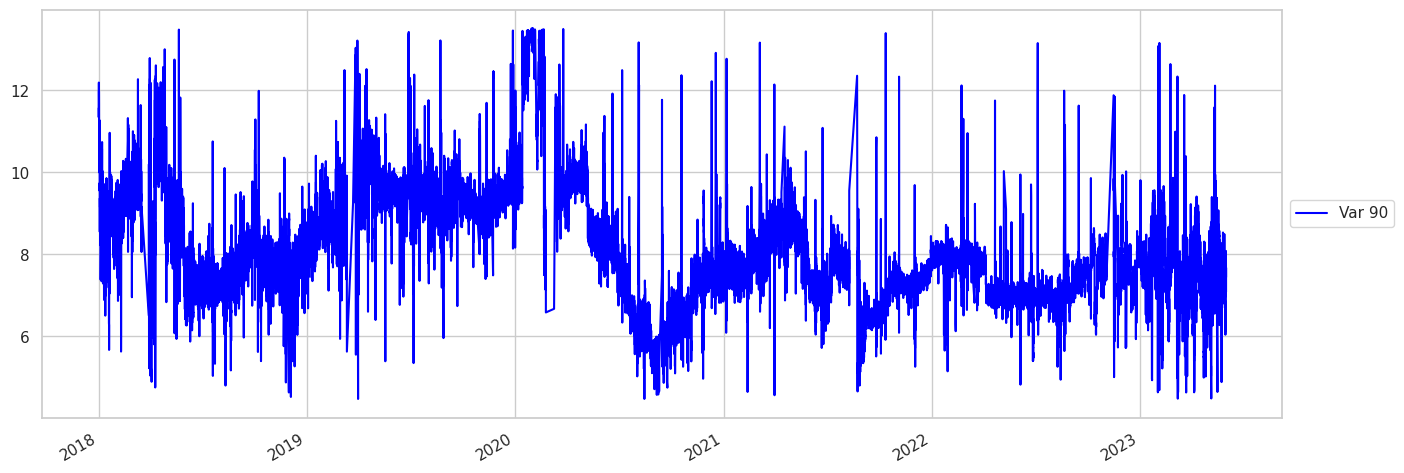

In [ ]:
#graficamos nuestra variable objetivo para ver su comportamiento
plot_var(df[target_feature],normalized=False)

In [ ]:
df.shape

(43928, 107)

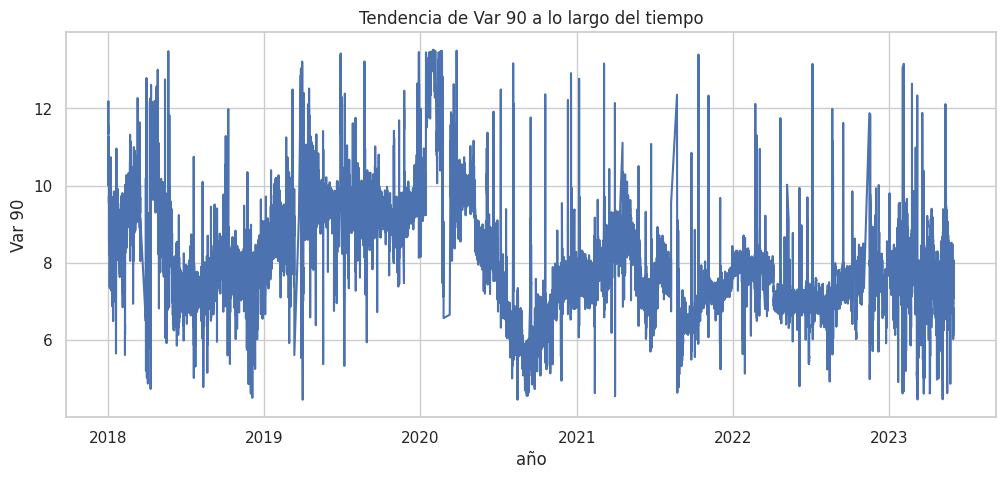

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Var 90'], linestyle='-')
plt.xlabel('año')
plt.ylabel('Var 90')
plt.title('Tendencia de Var 90 a lo largo del tiempo')
plt.grid(True)
plt.show()

In [ ]:
#generamos una lista nueva para eliminar los outliers de nuestras variables
lista_new= df.columns
len(lista_new)

107

In [ ]:
# Para eliminar los outliers, definimos los percentiles para establecer los límites
percentil_min = 1
percentil_max = 99

# Calculamos los límites para cada columna
limits_min = df[lista_new].quantile(percentil_min / 100)
limits_max = df[lista_new].quantile(percentil_max / 100)

# Filtramos las filas que estén dentro de los límites para cada columna en la lista outliers
for col in lista_new:
    df[col] = df[col].where(
        (df[col] >= limits_min[col]) & (df[col] <= limits_max[col]),
        other=pd.NA)

<Axes: >

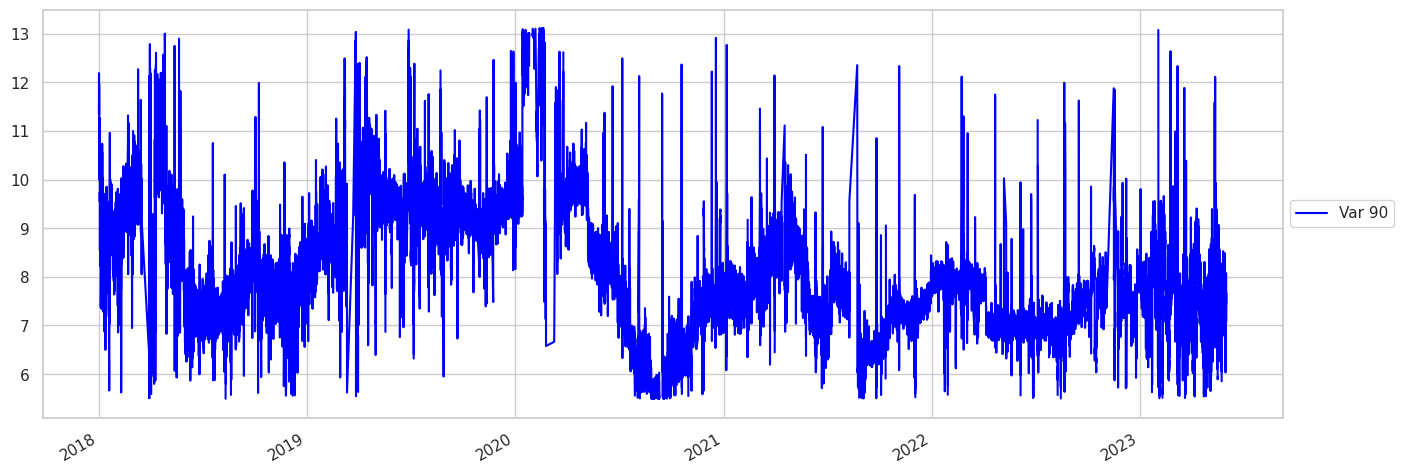

In [ ]:
#graficamos nuevamente nuestra variable objetivo para verificar la eliminación de los outliers.
plot_var(df[target_feature],normalized=False)

In [ ]:
#aplicamos interpolación linea para recuperar información, ya que esta metodología es adecuada para datos continuos
df= df.interpolate(method='linear')
#revisamos si quedan valores que no se lograron interpolar
df.isna().sum()

Var 1        0
Var 2        0
Var 4        0
Var 5      137
Var 7        0
          ... 
Var 129      0
Var 130      0
Var 131      0
Var 134      0
Var 135      0
Length: 107, dtype: int64

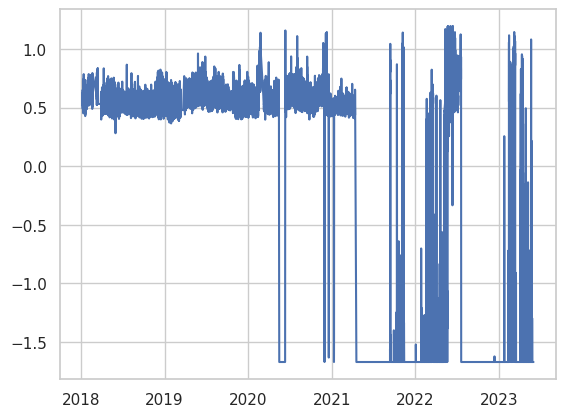

In [ ]:
plt.plot(df['Var 5'])
plt.show()

In [ ]:
#Eliminar variables OUTLER
df = df.drop(columns = ['Var 5'])

In [ ]:
#observamos cuantas filas nos van quedando
df.shape

(43928, 106)

### Correlaciones y visualizaciones
Las correlaciones y visualizaciones son herramientas esenciales en la etapa de exploración de datos y desempeñan un papel crucial en la construcción, evaluación e interpretación de modelos de machine learning. Ayudan a tomar decisiones informadas sobre la selección de características, la preparación de datos y la mejora del rendimiento del modelo.

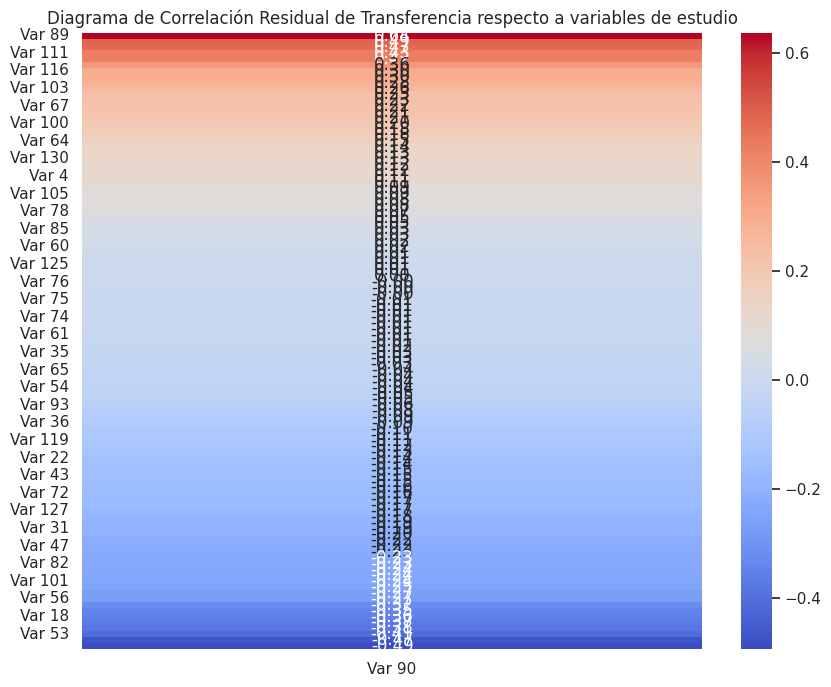

In [ ]:
#Generamos un dataframe de correlación respecto a nuestra variable objetivo
Correlación_variable = df.corr()[target_feature].to_frame()
# Ordenamos las correlaciones de mayor a menor
Correlación_sorted = Correlación_variable.sort_values(by=target_feature, ascending=False)
#eliminamos la variable label para que no se compare con sigo misma en la matriz
Correlación_sorted= Correlación_sorted.drop(target_feature)
# Creamos un mapa de calor de la matriz de correlación con los valores de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(Correlación_sorted, annot=True, fmt='.2f', cmap="coolwarm")
plt.title("Diagrama de Correlación Residual de Transferencia respecto a variables de estudio")
plt.show()

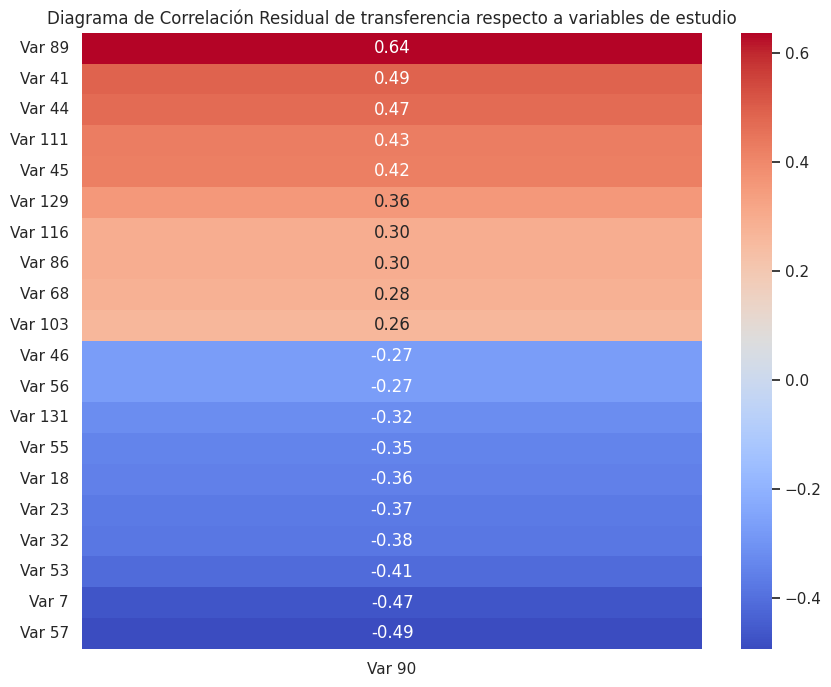

In [ ]:
# Para obtener solo los 20 mejores correlaciones concatenamos las dos listas
top_correlations = pd.concat([Correlación_sorted.head(10), Correlación_sorted.tail(10)])
#yticks=[f"{var} | {propiedades(var, 'nombre')}" for var in Correlación_sorted.index ]
#print(yticks[:10])
#print(yticks[-10:])
#yticks_combined = yticks[:10] + yticks[-10:]
#print(yticks_combined)

# Crear un mapa de calor de las 20 mejores correlaciones con los valores de correlación y etiquetas personalizadas
plt.figure(figsize=(10, 8))
ax = sns.heatmap(top_correlations, annot=True, fmt='.2f', cmap="coolwarm")
plt.title("Diagrama de Correlación Residual de transferencia respecto a variables de estudio")
plt.show()

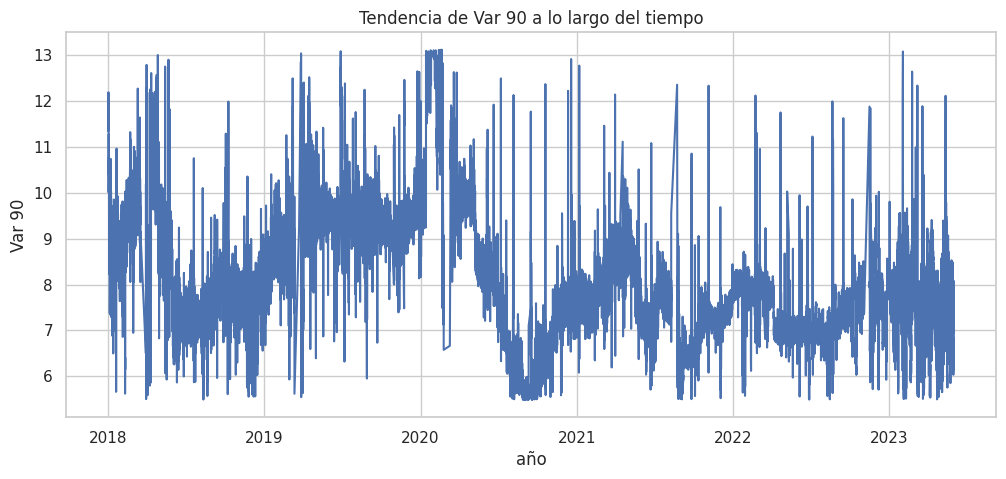

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Var 90'], linestyle='-')
plt.xlabel('año')
plt.ylabel('Var 90')
plt.title('Tendencia de Var 90 a lo largo del tiempo')
plt.grid(True)
plt.show()

In [ ]:
# Calcula el promedio diario
promedio_diario = df['Var 90'].resample('D').mean()



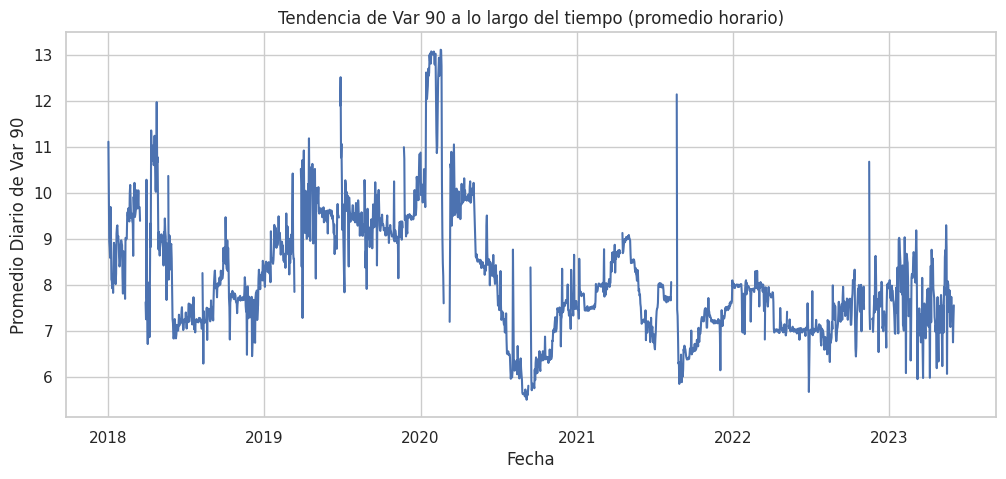

In [ ]:
# Crea una figura y grafica el promedio diario
plt.figure(figsize=(12, 5))
plt.plot(promedio_diario.index, promedio_diario, linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Promedio Diario de Var 90')
plt.title('Tendencia de Var 90 a lo largo del tiempo (promedio horario)')
plt.grid(True)
plt.show()

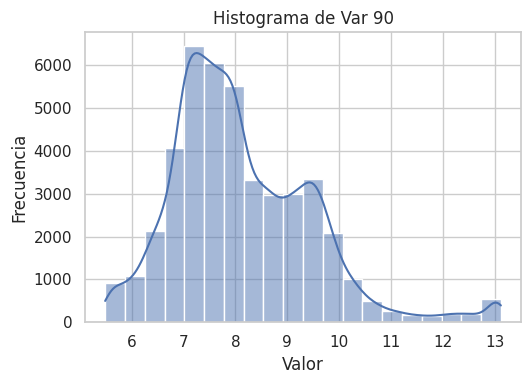

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Var 90'], bins=20, kde=True)
plt.title('Histograma de Var 90')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Encuentra el valor central (moda) utilizando Pandas
valor_central = df['Var 90'].mode().iloc[0]
print(f'El valor central del histograma es: {valor_central}')


El valor central del histograma es: 7.734428882598877


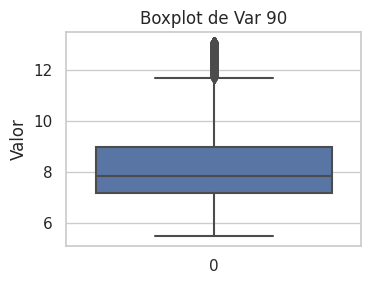

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(7, 3))

# Boxplot para 'Var 90'
plt.subplot(1, 2, 1)
sns.boxplot(data=df['Var 90'])
plt.title('Boxplot de Var 90')
plt.ylabel('Valor')

plt.tight_layout()
plt.show()

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


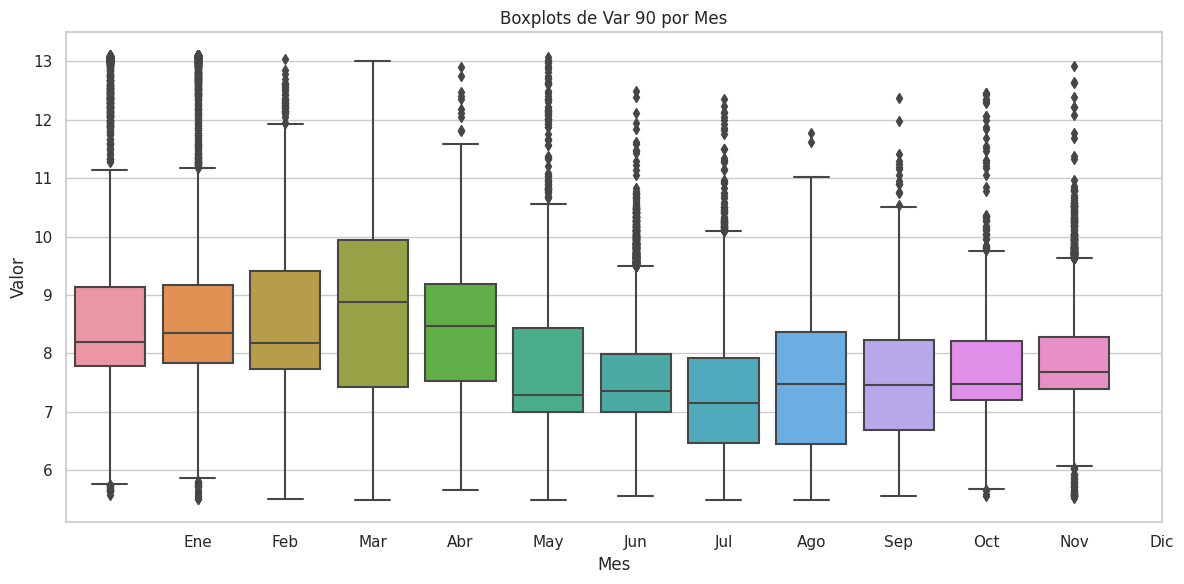

In [ ]:
# Agregar una columna para el mes
df['Mes'] = df.index.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Mes', y='Var 90')
plt.title('Boxplots de Var 90 por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()

plt.show()

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


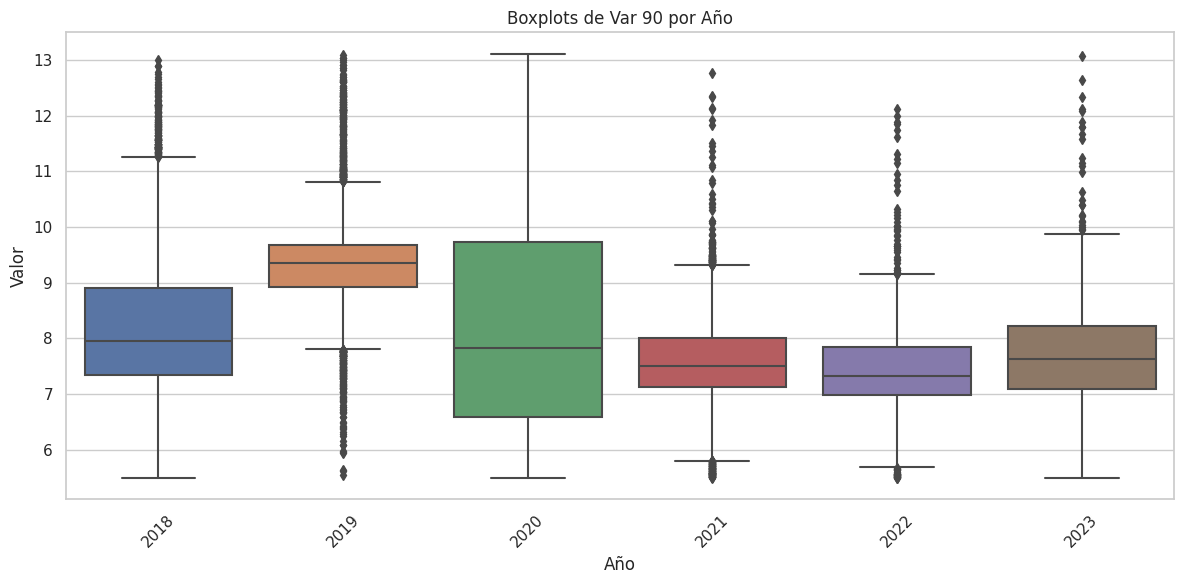

In [ ]:
# Agregar una columna para el año
df['Año'] = df.index.year

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Año', y='Var 90')
plt.title('Boxplots de Var 90 por Año')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para una mejor visualización
plt.tight_layout()

plt.show()

In [ ]:
### Correlaciones

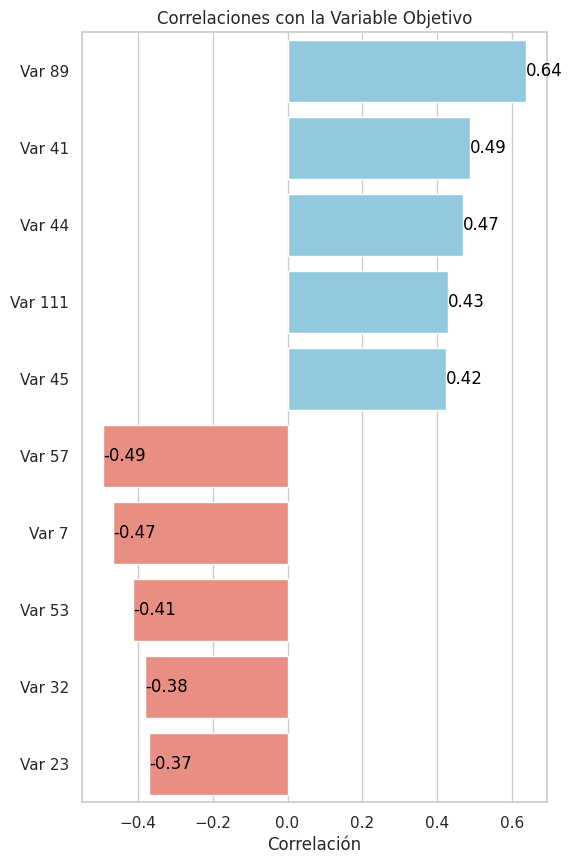

In [ ]:
# Calcula las correlaciones entre las variables independientes y la variable objetivo
correlations = df.corrwith(df['Var 90'])# Reemplaza 'VariableObjetivo' con el nombre real de tu variable objetivo
correlations = correlations.drop('Var 90')

# Obtén las 10 mejores correlaciones positivas y las 10 mejores correlaciones negativas
top_positive_corr = correlations[correlations > 0].nlargest(5)
top_negative_corr = correlations[correlations < 0].nsmallest(5)

# Combina las correlaciones positivas y negativas en un solo DataFrame
top_correlations = pd.concat([top_positive_corr, top_negative_corr])

# Crea una figura con un solo eje vertical
plt.figure(figsize=(6, 10))

# Crea el gráfico de barras con colores diferenciados para correlaciones positivas y negativas
colors = ['skyblue' if c > 0 else 'salmon' for c in top_correlations]
barplot = sns.barplot(x=top_correlations.values, y=top_correlations.index, orient='h', palette=colors)

# Configura el título y las etiquetas de los ejes
plt.title("Correlaciones con la Variable Objetivo")
plt.xlabel("Correlación")

# Anota cada barra con el valor de correlación
for i, v in enumerate(top_correlations):
    plt.text(v, i, f'{v:.2f}', va='center', fontsize=12, color='black')

# Muestra el gráfico
plt.show()

In [ ]:
corr_df = df.corr()
corr_df.loc['Var 90'].sort_values(ascending=False)

Var 90     1.000000
Var 89     0.637194
Var 41     0.488601
Var 44     0.469487
Var 111    0.428183
             ...   
Var 23    -0.370468
Var 32    -0.381029
Var 53    -0.412130
Var 7     -0.466849
Var 57    -0.493156
Name: Var 90, Length: 108, dtype: float64

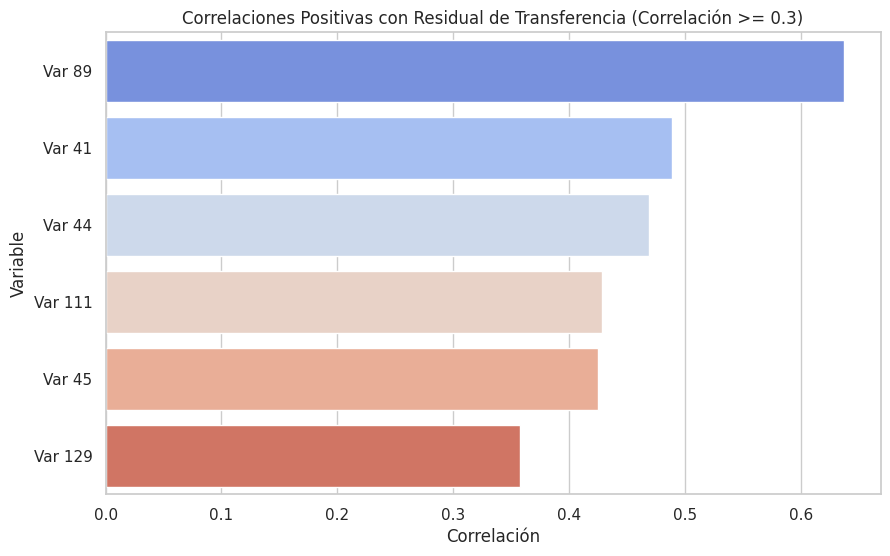

In [ ]:
# Supongamos que corr_df ya tiene las correlaciones calculadas

correlation_threshold = 0.3
corr_series = corr_df.loc['Var 90'].sort_values(ascending=False)

# Eliminar la correlación consigo misma
corr_series = corr_series.drop('Var 90', errors='ignore')

# Filtrar las variables con correlación mayor a 0.3
correlated_variables = corr_series[corr_series >= correlation_threshold]

# Crear un DataFrame con las variables correlacionadas
correlation_df = pd.DataFrame({'Variable': correlated_variables.index, 'Correlation': correlated_variables.values})

# Ordenar el DataFrame para que la variable con mayor correlación esté en la parte superior
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x='Correlation', y='Variable', orient='h', palette='coolwarm')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.title('Correlaciones Positivas con Residual de Transferencia (Correlación >= 0.3)')
plt.show()

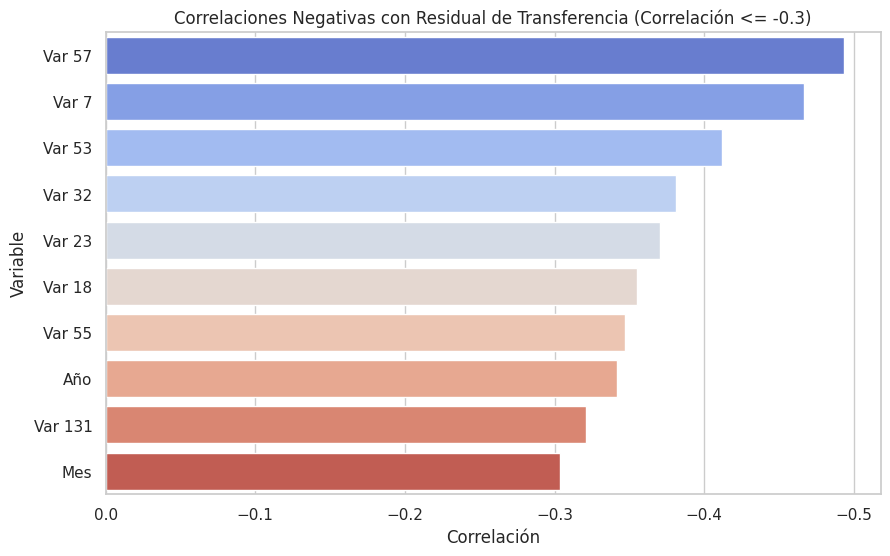

In [ ]:

# Supongamos que corr_df ya tiene las correlaciones calculadas

correlation_threshold = -0.3  # Cambia el umbral a -0.3 para correlaciones negativas
corr_series = corr_df.loc['Var 90'].sort_values(ascending=True)  # Orden ascendente para correlaciones negativas

# Eliminar la correlación consigo misma
corr_series = corr_series.drop('Var 90', errors='ignore')

# Filtrar las variables con correlación menor a -0.3
correlated_variables = corr_series[corr_series <= correlation_threshold]

# Crear un DataFrame con las variables correlacionadas negativamente
correlation_df = pd.DataFrame({'Variable': correlated_variables.index, 'Correlation': correlated_variables.values})

# Ordenar el DataFrame para que la variable con menor correlación esté en la parte superior
correlation_df = correlation_df.sort_values(by='Correlation', ascending=True)

# Crear el gráfico de barras utilizando Seaborn con el orden invertido
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=correlation_df, x='Correlation', y='Variable', orient='h', palette='coolwarm', order=correlation_df['Variable'])
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.title('Correlaciones Negativas con Residual de Transferencia (Correlación <= -0.3)')

# Invertir el eje x para que '0' esté a la izquierda
ax.invert_xaxis()

plt.show()


In [ ]:
correlation_threshold = 0.3  # Cambia el umbral a 0.3 para correlaciones positivas
corr_series = corr_df.loc['Var 90'].sort_values(ascending=False)  # Orden descendente para correlaciones positivas

# Eliminar la correlación consigo misma
corr_series = corr_series.drop('Var 90', errors='ignore')

# Filtrar las variables con correlación mayor a 0.3 (positivas)
correlated_variables = corr_series[corr_series >= correlation_threshold]

# Mostrar el listado de variables correlacionadas positivamente
print("Variables con correlación positiva (>= 0.3) con Var 90:")
print(correlated_variables.index.tolist())

Variables con correlación positiva (>= 0.3) con Var 90:
['Var 89', 'Var 41', 'Var 44', 'Var 111', 'Var 45', 'Var 129']


In [ ]:
correlation_threshold = -0.3  # Cambia el umbral a -0.3 para correlaciones negativas
corr_series = corr_df.loc['Var 90'].sort_values(ascending=False)  # Orden descendente para correlaciones positivas

# Eliminar la correlación consigo misma
corr_series = corr_series.drop('Var 90', errors='ignore')

# Filtrar las variables con correlación mayor a 0.3 (positivas)
correlated_variables = corr_series[corr_series <= correlation_threshold]

# Mostrar el listado de variables correlacionadas positivamente
print("Variables con correlación positiva (<= 0.3) con Var 90:")
print(correlated_variables.index.tolist())




Variables con correlación positiva (<= 0.3) con Var 90:
['Mes', 'Var 131', 'Año', 'Var 55', 'Var 18', 'Var 23', 'Var 32', 'Var 53', 'Var 7', 'Var 57']


In [ ]:
## Faltan variables importantes en el listado inicial

# Supongamos que corr_df ya tiene las correlaciones calculadas
variable_de_interes = 'Var 90'  # Variable de interés (Residual de Transferencia)
otra_variable = 'Var 40'  # La variable que deseas consultar

# Calcular la correlación entre las dos variables
correlacion = corr_df[variable_de_interes].corr(corr_df[otra_variable])

# Mostrar el valor de correlación
print(f"La correlación entre {variable_de_interes} y {otra_variable} es: {correlacion}")

La correlación entre Var 90 y Var 40 es: 0.4224667249122882


In [ ]:

# Supongamos que corr_df ya tiene las correlaciones calculadas
variable_de_interes = 'Var 90'  # Variable de interés (Residual de Transferencia)
otra_variable = 'Var 40'  # La variable que deseas consultar

# Calcular la correlación entre las dos variables
correlacion = corr_df[variable_de_interes].corr(corr_df[otra_variable])

# Mostrar el valor de correlación
print(f"La correlación entre {variable_de_interes} y {otra_variable} es: {correlacion}")

La correlación entre Var 90 y Var 40 es: 0.4224667249122882


## Modelado de datos
el uso de modelos predictivos como XGBoost es fundamental en una variedad de aplicaciones debido a su capacidad para proporcionar predicciones precisas, manejar datos desbalanceados y destacar las variables más importantes. Esto ayuda a las organizaciones a tomar decisiones informadas y a obtener información valiosa de sus datos.

In [ ]:
#separamos nuestra variable objetivo y la matriz de atributos
features, target = df.drop(target_feature, axis=1), df[target_feature]

In [ ]:
#entrenamos el modelo
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    features,
    target,
    test_size=0.2,
    shuffle=True,
    random_state=random_seed
)

In [ ]:
#definimos la ubicacion donde se guardara el modelo y el nombre
output_path = "content/drive/MyDrive/ProyectoIntegrado/INFO"
model_name = "modelALCALI2.joblib"

In [ ]:
#funcion para correr el modelo XGBoost
def get_model(X_train, y_train, X_test, y_test, model_name, cache=False, output_path=None):
    if cache and output_path is not None and os.path.exists(os.path.join(output_path, model_name)):
        print("Loaded from cache!")
        return joblib.load(os.path.join(output_path, model_name))

    model = get_fitted_model(X_train, y_train, X_test, y_test)

    if output_path is not None:
        joblib.dump(model, os.path.join(output_path, model_name), compress='lz4')

    return model

In [ ]:

def get_fitted_model(X_train, y_train, X_test, y_test):
    gpu_dict = {
        'objective': 'reg:squarederror',
        'tree_method': 'hist',
        'n_estimators': 2000,
        'max_depth': 10,
        'eta': 0.1,
        'subsample': 0.7,
        'colsample_bytree': 0.8,
        'eval_metric': mean_absolute_error,
        'verbosity': 2
    }
    gpu = xgb.XGBRegressor(**gpu_dict)
    gpu.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    return gpu

In [ ]:
!pip install lz4

In [ ]:
#ejecutamos nuestro modelo XGBoost con lo definido anteriormente
model = get_model(X_train, y_train, X_test, y_test, model_name, cache=False)

[02:29:43] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[02:29:43] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[0]	validation_0-rmse:6.96324	validation_0-mean_absolute_error:6.85062
[02:29:44] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[1]	validation_0-rmse:6.27336	validation_0-mean_absolute_error:6.16640
[02:29:45] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[2]	validation_0-rmse:5.65338	validation_0-mean_absolute_error:5.55155
[02:29:45] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[3]	validation_0-rmse:5.09477	validation_0-mean_absolute_error:4.99735
[02:29:46] INFO: ../src/gbm/gbtree.cc:179: Tre

In [ ]:
#funcion para las metricas
def regression_metrics(y_true, y_pred):
    mse = sklearn.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)
    r2 = sklearn.metrics.r2_score(y_true=y_true, y_pred=y_pred)
    mae = sklearn.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)

    # Graficar las predicciones vs. los valores reales
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Valor Real')
    plt.ylabel('Predicción')
    plt.title('Predicciones vs. Valores Reales')
    plt.show()

    return {'rmse': np.sqrt(mse), 'mse': mse, 'r2': r2, 'mae': mae}

[02:38:13] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.


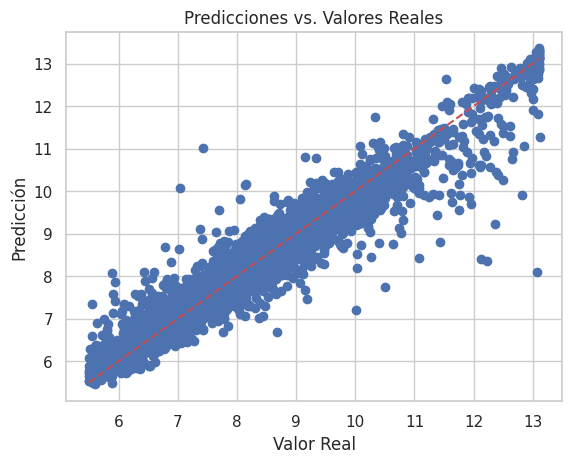

{'rmse': 0.3298359699304846,
 'mse': 0.10879176705998352,
 'r2': 0.9407422841759376,
 'mae': 0.20881698595602888}

In [ ]:
y_pred = model.predict(X_test)
metrics = regression_metrics(y_true=y_test, y_pred=y_pred)
metrics

In [ ]:
# ocupamos la función feature_importances para encontrar  importancias de las variables del modelo ejectuado mas arriba
feature_importances = model.feature_importances_

# Obtenemos los nombres de las características desde X_test.columns.tolist()
feature_names = X_test.columns.tolist()

# Creamos un DataFrame para almacenar las importancias y los nombres de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenamos el DataFrame por importancia en orden descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostramos las 10 características más importantes en forma de tabla
top_features = importance_df.head(15)
print(top_features)

# Creamos un gráfico de barras para visualizar las importancias de características
#plt.figure(figsize=(10, 6))
#plt.barh(top_features['Feature'], top_features['Importance'])
#plt.xlabel('Importancia')
#plt.ylabel('Características')
#plt.title('Top 10 Características más Importantes')
#plt.show()

     Feature  Importance
106      Año    0.710851
72    Var 89    0.095969
73    Var 93    0.061120
105      Mes    0.016107
29    Var 44    0.009403
42    Var 57    0.009346
96   Var 125    0.008335
8     Var 18    0.007885
81   Var 109    0.007418
38    Var 53    0.007326
93   Var 122    0.005304
5     Var 13    0.004967
95   Var 124    0.003576
88   Var 117    0.003554
74   Var 100    0.002772


In [ ]:
#ahora utilizamos selectfrommodel para encontrar los nombres de las caracteristicas mas importantes para nuevamente aplicarlas en el modelo XGBoost y conseguir el "best modelo"
X = X_test
y = y_test

# Obtener las importancias de características desde el modelo XGBoost
feature_importances = model.feature_importances_

# Crear un objeto SelectFromModel con el umbral especificado
threshold = 0.010
sel = SelectFromModel(model, threshold=threshold)

# Ajustar el objeto SelectFromModel a los datos y obtener las características seleccionadas
selected_features = sel.fit_transform(X, y)

# Obtener los índices de las características seleccionadas
selected_feature_indices = sel.get_support(indices=True)

# Obtener los nombres de las características seleccionadas
selected_feature_names = X.columns[selected_feature_indices]

# Mostrar los nombres de las características seleccionadas
print("Características seleccionadas:")
print(selected_feature_names)

[02:38:32] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[02:38:32] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[02:38:32] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[02:38:32] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[02:38:32] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[02:38:32] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[02:38:32] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[02:38:32] INFO: ../src/gbm/gbtree.cc:179: Tree method is sele

In [ ]:
#aplicamos el mejor modelo con las caracteristicas seleccionada del modelo xgbBoost
last_X_train, last_X_test, last_y_train, last_y_test = sklearn.model_selection.train_test_split(
    features[selected_feature_names],
    target,
    test_size=0.2,
    shuffle=True,
    random_state=random_seed
)
best_model = get_fitted_model(last_X_train, last_y_train, last_X_test, last_y_test)

[02:40:37] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[02:40:37] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[0]	validation_0-rmse:6.96336	validation_0-mean_absolute_error:6.84993
[02:40:37] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[1]	validation_0-rmse:6.27334	validation_0-mean_absolute_error:6.16578
[02:40:37] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[2]	validation_0-rmse:5.65275	validation_0-mean_absolute_error:5.55011
[02:40:38] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[3]	validation_0-rmse:5.09427	validation_0-mean_absolute_error:4.99562
[02:40:38] INFO: ../src/gbm/gbtree.cc:179: Tre

[02:42:46] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.


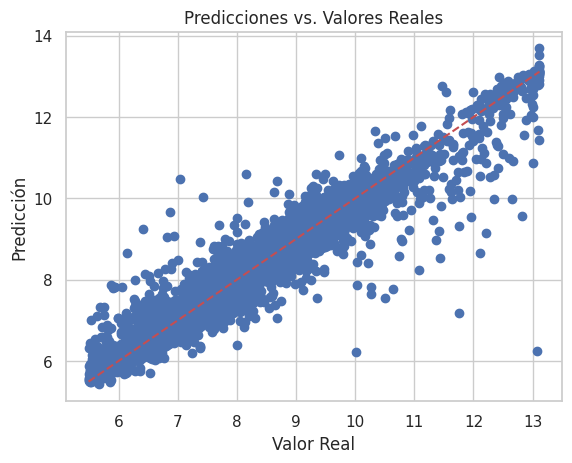

{'rmse': 0.3559270091758568,
 'mse': 0.12668403586087043,
 'r2': 0.9309965560872846,
 'mae': 0.22065351139742148}

In [ ]:
# Realizar predicciones utilizando el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(last_X_test)

#utilizamos las metricas para ver el rendimiento del   best modelo obtenido
metrics = regression_metrics(y_true=last_y_test, y_pred=y_pred)
metrics

In [ ]:
def get_permutation_importance(model, X_test, y_test):
    result = permutation_importance(model, X_test, y_test, #n_repeats=50,
                                random_state=random_seed,
                                #n_jobs=-1
                                   )
    sorted_idx = result.importances_mean.argsort()
    return result

In [ ]:
# ahora obtendremos las importancia de permutación para evaluar las características del mejor modelo
permutation_importance_result = get_permutation_importance(best_model, last_X_test, last_y_test)

Text(0.5, 1.0, 'Permutation Importances (test set)')

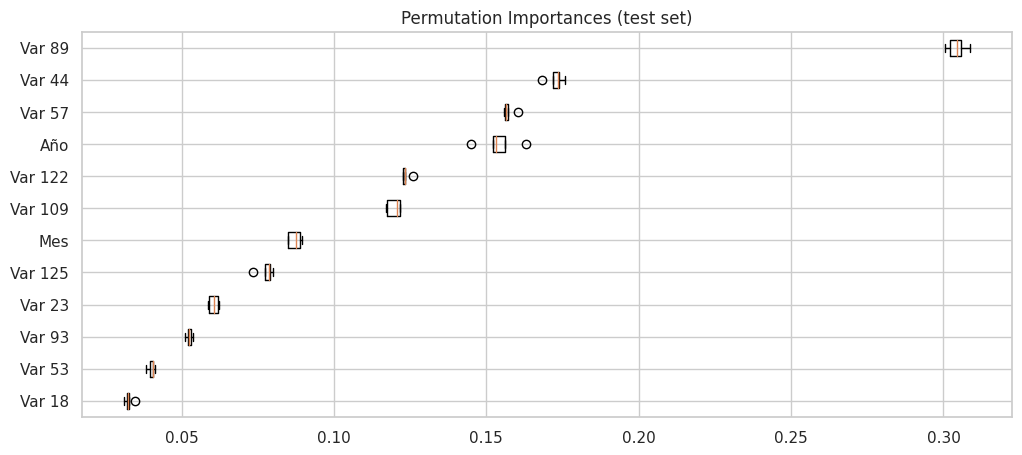

In [ ]:
#ya con las importancias de permutación seleccionadas, crearemos un grafico de caja para ver su comportamiento.
# Número de características a seleccionar
num_selected_features = 15

# Ordenar los índices según la importancia de permutación promedio
sorted_idx = permutation_importance_result.importances_mean.argsort()

# Limitar el número de características seleccionadas según 'num_selected_features'
if len(sorted_idx) - num_selected_features > 0:
    sorted_idx = sorted_idx[len(sorted_idx) - num_selected_features:]

# Crear un gráfico de caja para visualizar las importancias de permutación
fig, ax = plt.subplots(figsize=(12, 5))
ax.boxplot(permutation_importance_result.importances[sorted_idx].T,
           vert=False, labels=last_X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")

### Shap Summary Plot
Un Shap Summary Plot es una representación gráfica que muestra un resumen de las contribuciones de las variables de entrada en un modelo predictivo, utilizando la biblioteca SHAP (SHapley Additive exPlanations). Este tipo de gráfico es útil para comprender cómo las diferentes características afectan las predicciones del modelo y cuál es su impacto relativo en el resultado final.

In [ ]:
!pip install shap


In [ ]:
explainer = shap.TreeExplainer(best_model)

In [ ]:
# Crear un nuevo DataFrame 'test_df' utilizando el conjunto de prueba
test_df = last_X_test

# Agregar la columna de la característica objetivo 'target_feature' al DataFrame
test_df[target_feature] = last_y_test

# Muestrear el DataFrame 'test_df' al 80% de su tamaño original
test_df = test_df.sample(frac=0.8)

In [ ]:
X_explain = test_df.drop(target_feature, axis=1)
shap_values = explainer.shap_values(X_explain, check_additivity=False)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


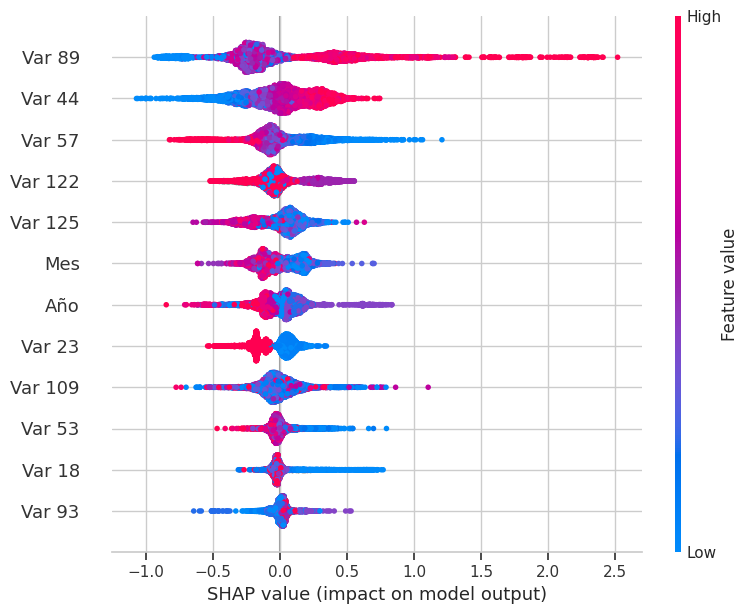

In [ ]:
shap.summary_plot(shap_values, X_explain)